In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import svm
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from google.colab import files

In [2]:
#!pip install tldextract
import tldextract

In [3]:
#dataset sa benignim url-ovima
ds_benign= pd.read_csv('https://raw.githubusercontent.com/matf-ml/ml19-classifying-spam-urls/master/Benign_list_big_final.csv', header = None)
ds_benign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35378 entries, 0 to 35377
Data columns (total 1 columns):
0    35378 non-null object
dtypes: object(1)
memory usage: 276.5+ KB


In [4]:
ds_benign.columns = ['url']
ds_benign['label'] = 0
ds_benign.head()

,url,label
0,http://1337x.to/torrent/1048648/American-Snipe...,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0


In [5]:
#dataset sa spam url-ovima
ds_spam = pd.read_csv('https://raw.githubusercontent.com/matf-ml/ml19-classifying-spam-urls/master/spam_dataset.csv', header = None)
ds_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 1 columns):
0    12000 non-null object
dtypes: object(1)
memory usage: 93.8+ KB


In [6]:
ds_spam.columns = ['url']
ds_spam['label'] = 1
ds_spam.head()

,url,label
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,1
1,http://archive.salisburyjournal.co.uk/2007/3/6...,1
2,http://appbasic.jettons.co.uk/links/index.html,1
3,http://archive.yorkpress.co.uk/2003/11/6/25684...,1
4,http://acard4u.co.uk/product_reviews.php?cPath...,1


In [7]:
#dataset sa malware url-ovima
ds_malware = pd.read_csv('https://raw.githubusercontent.com/matf-ml/ml19-classifying-spam-urls/master/Malware_dataset.csv', header = None)
ds_malware.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11566 entries, 0 to 11565
Data columns (total 1 columns):
0    11566 non-null object
dtypes: object(1)
memory usage: 90.4+ KB


In [8]:
ds_malware.columns = ['url']
ds_malware['label'] = 1
ds_malware.head()

,url,label
0,http://gzzax.livechatvalue.com/chat/chatClient...,1
1,http://gzzax.livechatvalue.com/chat/chatClient...,1
2,http://gzzax.livechatvalue.com/chat/chatClient...,1
3,http://gzzax.livechatvalue.com/chat/chatClient...,1
4,http://mtsx.com.cn/UploadFiles/2011-08/admin/%...,1


In [9]:
#dataset sa phishing url-ovima
ds_phishing = pd.read_csv('https://raw.githubusercontent.com/matf-ml/ml19-classifying-spam-urls/master/phishing_dataset.csv', header = None)
ds_phishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 1 columns):
0    9965 non-null object
dtypes: object(1)
memory usage: 77.9+ KB


In [10]:
ds_phishing.columns = ['url']
ds_phishing['label'] = 1
ds_phishing.head()

,url,label
0,http://v2.email-marketing.adminsimple.com/trac...,1
1,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,1
2,http://webmail2.centurytel.net/hwebmail/servic...,1
3,http://www.google.com.ng/imgres?imgurl=http://...,1
4,http://webmail2.centurytel.net/hwebmail/servic...,1


In [11]:
#dataset sa defacement url-ovima
ds_defacement = pd.read_csv('https://raw.githubusercontent.com/matf-ml/ml19-classifying-spam-urls/master/DefacementSitesURLFiltered.csv', header = None)
ds_defacement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96457 entries, 0 to 96456
Data columns (total 1 columns):
0    96457 non-null object
dtypes: object(1)
memory usage: 753.6+ KB


In [12]:
ds_defacement.columns = ['url']
ds_defacement['label'] = 1
#shuffle dataseta da bi dobili raznovrsnije podatke, jer cemo posle uzeti samo 10k od oko 90k redova iz njega
ds_defacement = ds_defacement.sample(frac=1).reset_index(drop=True)
ds_defacement.head()

,url,label
0,http://www.textilexpres.com/TE/index.php?optio...,1
1,http://sparcochile.com/index.php?option=com_vi...,1
2,http://www.einsteininrastatt.de/index.php/spei...,1
3,http://www.webopro.com/index.php/sits.1,1
4,http://www.lebenslauf-fischerbach.de/index.php...,1


In [13]:
ds_comb = ds_benign.append(ds_spam)
ds_comb = ds_comb.append(ds_malware)
ds_comb = ds_comb.append(ds_phishing)
#uzimamo 20k redova iz defacement dataset-a jer je preveliki, a hocemo da sacuvamo odnos losih i dobrih url-ova priblizno 60-40
ds_defacement = ds_defacement[:20000]
ds_comb = ds_comb.append(ds_defacement)
ds_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88909 entries, 0 to 19999
Data columns (total 2 columns):
url      88909 non-null object
label    88909 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [14]:
ds_comb['label'].value_counts()

1    53531
0    35378
Name: label, dtype: int64

In [15]:
#shuffle dataseta da bi videli raznovrsnije podatke
ds_comb = ds_comb.sample(frac=1).reset_index(drop=True)
ds_comb.head()

,url,label
0,http://www.emyvalecottage.com/index.php?view=a...,1
1,http://sprint.com/business/solutions/sprint_en...,0
2,http://momoshop.com.tw/category/LgrpCategory.j...,0
3,http://spplodz.nazwa.pl/archiwum/2008_01a.php,1
4,http://9779.info/%E4%BC%9A%E5%8A%A8%E7%9A%84%E...,1


In [16]:
#fja za dobijanje deep url-a iz url-a jer samo deep url koristimo za MultinomialNB
def get_deep_url_from_url(url):
  path = urlparse(url)
  if path.query:
    return str(path.path) + str('?') + str(path.query)
  else:
    return str(path.path)

ds_comb['deep url'] = ds_comb['url'].apply(lambda x : get_deep_url_from_url(x))
ds_comb['len deep url'] = ds_comb['deep url'].apply(lambda x : len(x))
ds_comb.head()

,url,label,deep url,len deep url
0,http://www.emyvalecottage.com/index.php?view=a...,1,/index.php?view=article&catid=1:latest-news&id...,154
1,http://sprint.com/business/solutions/sprint_en...,0,/business/solutions/sprint_enablers/index.html...,71
2,http://momoshop.com.tw/category/LgrpCategory.j...,0,/category/LgrpCategory.jsp?l_code=2110500000&A...,101
3,http://spplodz.nazwa.pl/archiwum/2008_01a.php,1,/archiwum/2008_01a.php,22
4,http://9779.info/%E4%BC%9A%E5%8A%A8%E7%9A%84%E...,1,/%E4%BC%9A%E5%8A%A8%E7%9A%84%E6%B0%B4%E6%9E%9C...,74


In [0]:
#radimo split deep url-a na reci da bi koristili to kao feature za MultinomialNB
import re
def split_deep_url(url):
    word_list = re.compile(r'[\:/?=\-&$~<>;%_\.\+\\]+',re.UNICODE).split(url)
    #cuvaju se samo reci duze od 2 karaktera u deep url
    word_list1 = [elem for elem in word_list if len(elem) > 2] 
    words_string = ' '.join(word_list1)
    return str(words_string)

In [18]:
ds_comb['deep url'] = ds_comb['deep url'].apply(lambda x : split_deep_url(x))
ds_comb.head()

,url,label,deep url,len deep url
0,http://www.emyvalecottage.com/index.php?view=a...,1,index php view article catid latest news brief...,154
1,http://sprint.com/business/solutions/sprint_en...,0,business solutions sprint enablers index html ...,71
2,http://momoshop.com.tw/category/LgrpCategory.j...,0,category LgrpCategory jsp code 2110500000 Area...,101
3,http://spplodz.nazwa.pl/archiwum/2008_01a.php,1,archiwum 2008 01a php,22
4,http://9779.info/%E4%BC%9A%E5%8A%A8%E7%9A%84%E...,1,,74


In [0]:
#primenjujemo CountVectorizer da bismo imali ulaz za MultinomialDB
x = ds_comb['deep url']
y = ds_comb['label']

In [20]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=7, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(59569,)
(29340,)
(59569,)
(29340,)


In [21]:
from sklearn import feature_extraction
vectorized = feature_extraction.text.CountVectorizer()
x_train_t = vectorized.fit_transform(x_train)
vectorized.vocabulary_

{'app': 24518,
 'member': 47931,
 'sportoption': 61106,
 'php': 53438,
 'uid': 64803,
 'guest': 40244,
 'langx': 45601,
 'login': 46503,
 'html': 41528,
 'url': 65231,
 '2f25901805': 11133,
 '2fstock': 11988,
 'photo': 53405,
 'breakfast': 28552,
 'with': 67500,
 'coffee': 31166,
 'orange': 51821,
 'juice': 44028,
 'watch': 66943,
 'men': 47957,
 'days': 33047,
 'future': 38740,
 'past': 52804,
 'online': 51651,
 'free': 38458,
 'putlocker': 55541,
 '852683': 20343,
 'cars': 29764,
 'bmw': 28045,
 '1er': 6576,
 'all': 23838,
 'search': 58882,
 '5bstate': 18443,
 '5bperiod': 18427,
 '5bcustom': 18380,
 '5bsection': 18442,
 '5bmark': 18414,
 '5b0': 18339,
 'folder': 38106,
 '4277': 15459,
 '4317': 15512,
 'bbs': 26670,
 'data': 32969,
 'ebay': 35381,
 'comm': 31348,
 'sq1': 61184,
 'index': 42525,
 '7854195': 19758,
 'pack': 52397,
 '8oz': 20976,
 'raw': 56152,
 'revolution': 57194,
 'organic': 51865,
 'live': 46347,
 'food': 38155,
 'bars': 26466,
 'various': 65702,
 'flavors': 37947,
 

In [22]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_t, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
x_test_t = vectorized.transform(x_test)
x_test_t

<29340x68775 sparse matrix of type '<class 'numpy.int64'>'
	with 203750 stored elements in Compressed Sparse Row format>

In [0]:
y_pred = nb.predict(x_test_t)

In [25]:
metrics.accuracy_score(y_test, y_pred)

0.9583162917518746

In [26]:
metrics.confusion_matrix(y_test, y_pred)

array([[11054,   621],
       [  602, 17063]])

In [27]:
#dobijamo predvidjene verovatnoce za pripadnost klasi 0 i 1, respektivno
#klasa 0 znaci label = 0 
y_pred_proba = nb.predict_proba(x_test_t)
y_pred_proba

array([[2.02116380e-03, 9.97978836e-01],
       [9.99999992e-01, 7.69499027e-09],
       [3.97908308e-01, 6.02091692e-01],
       ...,
       [9.99999996e-01, 4.26006960e-09],
       [5.65899971e-04, 9.99434100e-01],
       [2.22312617e-18, 1.00000000e+00]])

In [0]:
y_pred_proba_0 = y_pred_proba[:, 0]
y_pred_proba_1 = y_pred_proba[:, 1]

In [29]:
#pravimo dataframe od x_test jer hocemo dobijene verovatnoce da koristimo kao feature za SVM i RF
df_test = x_test.to_frame()
df_test.head()

,deep url
41557,veranstaltungen details aweg4mi treffen regens...
26651,cdsb board php board love view category auth p...
67958,
12582,index php option com weblinks view category an...
67901,264781 the latest attack americas car culture ...


In [30]:
df_test['label_proba_0'] = y_pred_proba_0
df_test['label_proba_1'] = y_pred_proba_1
df_test.head()

,deep url,label_proba_0,label_proba_1
41557,veranstaltungen details aweg4mi treffen regens...,2.021164e-03,9.979788e-01
26651,cdsb board php board love view category auth p...,1.000000e+00,7.694990e-09
67958,,3.979083e-01,6.020917e-01
12582,index php option com weblinks view category an...,1.261291e-14,1.000000e+00
67901,264781 the latest attack americas car culture ...,9.999996e-01,4.057966e-07


In [31]:
#radicemo join sa originalnim datasetom pa nam ne treba deep url kolona
df_test = df_test.drop('deep url', axis = 1)
df_test.head()

,label_proba_0,label_proba_1
41557,2.021164e-03,9.979788e-01
26651,1.000000e+00,7.694990e-09
67958,3.979083e-01,6.020917e-01
12582,1.261291e-14,1.000000e+00
67901,9.999996e-01,4.057966e-07


In [32]:
#join sa originalnim datasetom - radi join po indeksu, a dodeljuje nan vrednosti u redovima koji nisu u x_test
final_ds = ds_comb.join(df_test)
final_ds.head()

,url,label,deep url,len deep url,label_proba_0,label_proba_1
0,http://www.emyvalecottage.com/index.php?view=a...,1,index php view article catid latest news brief...,154,9.566127e-27,1.000000
1,http://sprint.com/business/solutions/sprint_en...,0,business solutions sprint enablers index html ...,71,9.616888e-01,0.038311
2,http://momoshop.com.tw/category/LgrpCategory.j...,0,category LgrpCategory jsp code 2110500000 Area...,101,NaN,NaN
3,http://spplodz.nazwa.pl/archiwum/2008_01a.php,1,archiwum 2008 01a php,22,NaN,NaN
4,http://9779.info/%E4%BC%9A%E5%8A%A8%E7%9A%84%E...,1,,74,NaN,NaN


In [33]:
#izbacujemo redove sa nan vrednostima i resetujemo index da bi sad radili sa novim datasetom predikciju za SVM i RF
final_ds = final_ds.dropna()
final_ds = final_ds.reset_index(drop=True)
final_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29340 entries, 0 to 29339
Data columns (total 6 columns):
url              29340 non-null object
label            29340 non-null int64
deep url         29340 non-null object
len deep url     29340 non-null int64
label_proba_0    29340 non-null float64
label_proba_1    29340 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.3+ MB


In [0]:
#dodajemo kolone za duzinu domain-a i suffix

def get_len_of_domain_url(url):
  ext = tldextract.extract(url)
  return len(ext.domain)
    
def get_suffix_url(url):
  ext = tldextract.extract(url)
  return str(ext.suffix)

final_ds['len of domain'] = final_ds['url'].apply(lambda x : get_len_of_domain_url(x))
final_ds['suffix'] = final_ds['url'].apply(lambda x : get_suffix_url(x))

In [0]:
#suffix kolona (top level domain-tld u radu) ima previse razlicitih vrednosti i radi se cutoff za frekvenciju < 50  
minFreq = 50 
suffix_values = final_ds['suffix'].value_counts() # Specific column 
to_remove = suffix_values[suffix_values <= minFreq].index
final_ds['suffix'].replace(to_remove, np.nan, inplace=True)

In [36]:
#sada imamo nedostajuce vrednosti(nan) u koloni suffix, pa izbacujemo takve redove i resetujemo index
final_ds = final_ds.dropna()
final_ds = final_ds.reset_index(drop=True)
final_ds['suffix'].value_counts()

com       12051
co.uk      3383
net        2194
info       1371
de          858
ac.uk       779
org         678
com.br      583
ru          580
pl          445
nl          444
vn          420
it          382
cc          259
jp          250
ro          225
com.au      214
net.ua      175
com.vn      158
fr          154
org.uk      150
gr          138
in          126
ua          125
eu          123
co.id       117
cn          117
gov.uk      116
to          115
ir          112
asia        103
es           96
net.vn       86
cz           84
com.ua       83
hu           82
tv           79
at           79
com.my       78
ch           72
com.cn       72
             71
cl           69
dk           65
com.ar       64
gov.br       64
co.za        61
com.tw       59
se           59
be           56
Name: suffix, dtype: int64

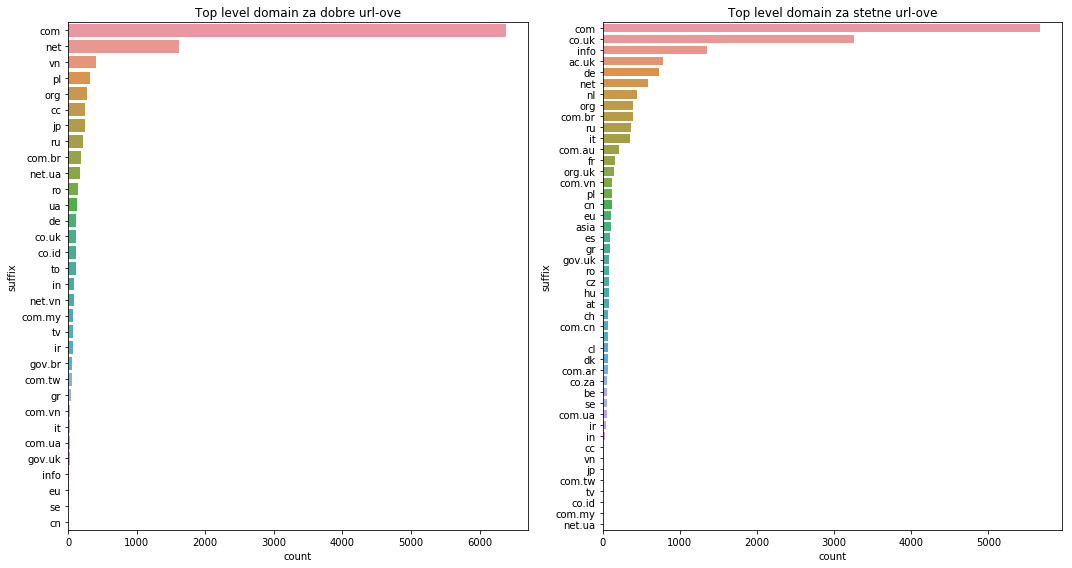

In [37]:
fig = plt.figure(figsize=(15,8))
fig.add_subplot(1,2,1)  
plt.title('Top level domain za dobre url-ove')
sns.countplot(y = final_ds[final_ds['label']==0]['suffix'], order = final_ds[final_ds['label']==0]['suffix'].value_counts().index)
fig.add_subplot(1,2,2) 
plt.title('Top level domain za stetne url-ove')
sns.countplot(y = final_ds[final_ds['label']==1]['suffix'],order = final_ds[final_ds['label']==1]['suffix'].value_counts().index) 
plt.tight_layout()
plt.show()

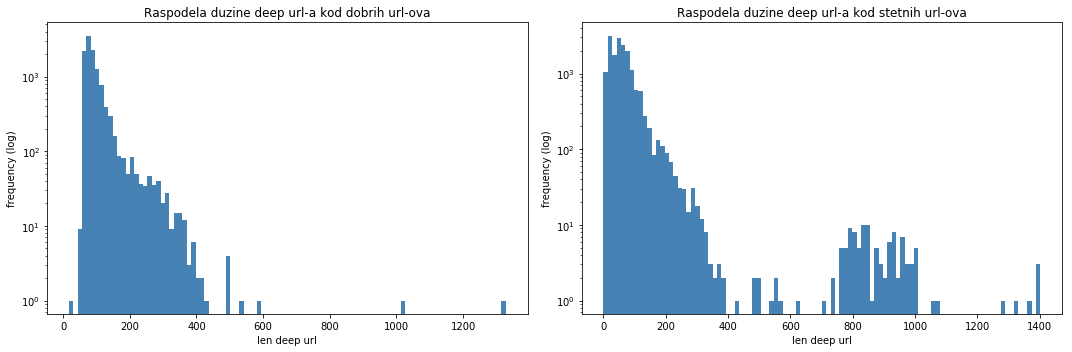

In [38]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)  
plt.title('Raspodela duzine deep url-a kod dobrih url-ova')
plt.hist(final_ds[final_ds['label']==0]['len deep url'], log = True, color = 'steelblue', bins=100)
plt.ylabel("frequency (log)")
plt.xlabel("len deep url")
fig.add_subplot(1,2,2) 
plt.title('Raspodela duzine deep url-a kod stetnih url-ova')
plt.hist(final_ds[final_ds['label']==1]['len deep url'], log = True, color = 'steelblue', bins=100)
plt.ylabel("frequency (log)")
plt.xlabel("len deep url")
plt.tight_layout()
plt.show()

In [39]:
#izbacujemo nepotrebne kolone (url, deep url) i enkodiramo kategoricku promenljivu suffix, kao u radu
final_ds = final_ds.drop(['url', 'deep url'], axis = 1)
final_ds = pd.get_dummies(final_ds, prefix = ['suffix'], columns = ['suffix'])
final_ds.head()

,label,len deep url,label_proba_0,label_proba_1,len of domain,suffix_,suffix_ac.uk,suffix_asia,suffix_at,suffix_be,suffix_cc,suffix_ch,suffix_cl,suffix_cn,suffix_co.id,suffix_co.uk,suffix_co.za,suffix_com,suffix_com.ar,suffix_com.au,suffix_com.br,suffix_com.cn,suffix_com.my,suffix_com.tw,suffix_com.ua,suffix_com.vn,suffix_cz,suffix_de,suffix_dk,suffix_es,suffix_eu,suffix_fr,suffix_gov.br,suffix_gov.uk,suffix_gr,suffix_hu,suffix_in,suffix_info,suffix_ir,suffix_it,suffix_jp,suffix_net,suffix_net.ua,suffix_net.vn,suffix_nl,suffix_org,suffix_org.uk,suffix_pl,suffix_ro,suffix_ru,suffix_se,suffix_to,suffix_tv,suffix_ua,suffix_vn
0,1,154,9.566127e-27,1.000000,14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,71,9.616888e-01,0.038311,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,51,1.065991e-09,1.000000,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,74,9.998239e-01,0.000176,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,77,9.999947e-01,0.000005,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [40]:
#prebacujemo kolone u numericke
final_ds['len of domain'] = pd.to_numeric(final_ds['len of domain'])
final_ds['len deep url'] = pd.to_numeric(final_ds['len deep url'])
final_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28324 entries, 0 to 28323
Data columns (total 55 columns):
label            28324 non-null int64
len deep url     28324 non-null int64
label_proba_0    28324 non-null float64
label_proba_1    28324 non-null float64
len of domain    28324 non-null int64
suffix_          28324 non-null uint8
suffix_ac.uk     28324 non-null uint8
suffix_asia      28324 non-null uint8
suffix_at        28324 non-null uint8
suffix_be        28324 non-null uint8
suffix_cc        28324 non-null uint8
suffix_ch        28324 non-null uint8
suffix_cl        28324 non-null uint8
suffix_cn        28324 non-null uint8
suffix_co.id     28324 non-null uint8
suffix_co.uk     28324 non-null uint8
suffix_co.za     28324 non-null uint8
suffix_com       28324 non-null uint8
suffix_com.ar    28324 non-null uint8
suffix_com.au    28324 non-null uint8
suffix_com.br    28324 non-null uint8
suffix_com.cn    28324 non-null uint8
suffix_com.my    28324 non-null uint8
suffix_com.tw

In [0]:
X_final = final_ds.drop(['label'],axis=1)
y_final = final_ds['label']

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_final, y_final, test_size=0.1, random_state=42, stratify = y_final)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.20, random_state=42, stratify = y_train_valid)

In [0]:
ss1 = StandardScaler()
X_train = ss1.fit_transform(X_train)
X_valid = ss1.transform(X_valid)

In [0]:
ss2 = StandardScaler()
X_train_valid = ss2.fit_transform(X_train_valid)
X_test = ss2.transform(X_test)

In [0]:
def get_params_rf(X_train, y_train, X_valid, y_valid):
  n_estim = [100, 200]
  max_depths = [10, 20, 30]
  criterions = ['gini', 'entropy']
  best_score = 0 
  best_params = {'n_estimators': 0, 'max_depth': 0, 'criterion': 'gini'}

  for n in n_estim: 
      for max_d in max_depths:
        for crit in criterions:
          rf = RandomForestClassifier(n_estimators = n, max_depth = max_d, criterion = crit)
          rf.fit(X_train, y_train)
          y_pred = rf.predict(X_valid)
          score = metrics.accuracy_score(y_valid, y_pred)
          if score>best_score: 
            best_score = score
            best_params['n_estimators'] = n
            best_params['max_depth'] = max_d
            best_params['criterion'] = crit
  return best_params

In [45]:
best_params = get_params_rf(X_train, y_train, X_valid, y_valid)
print('Best parameters:\n', best_params)
rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], criterion=best_params['criterion'])
rf.fit(X_train_valid, y_train_valid)

Best parameters:
 {'n_estimators': 100, 'max_depth': 30, 'criterion': 'entropy'}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
y_train_valid_pred = rf.predict(X_train_valid)
y_test_pred = rf.predict(X_test)
print('Train report: {}'.format(metrics.classification_report(y_train_valid, y_train_valid_pred)))
print('Test report: {}'.format(metrics.classification_report(y_test, y_test_pred)))

Train report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10391
           1       1.00      1.00      1.00     15100

    accuracy                           1.00     25491
   macro avg       1.00      1.00      1.00     25491
weighted avg       1.00      1.00      1.00     25491

Test report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1155
           1       1.00      1.00      1.00      1678

    accuracy                           1.00      2833
   macro avg       1.00      1.00      1.00      2833
weighted avg       1.00      1.00      1.00      2833



In [47]:
metrics.accuracy_score(y_train_valid, y_train_valid_pred)

0.9998038523400415

In [48]:
metrics.accuracy_score(y_test, y_test_pred)

0.9964701729615248

In [49]:
confusion_matrix(y_test, y_test_pred)

array([[1150,    5],
       [   5, 1673]])

In [50]:
#najbitniji atributi opadajuce
feature_importances = zip(list(X_final), rf.feature_importances_)
feature_importances_sort = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for feature in feature_importances_sort:
    print(feature)

('label_proba_0', 0.3959656325658461)
('label_proba_1', 0.3180566673238264)
('len deep url', 0.1545151927846421)
('len of domain', 0.04187757863682769)
('suffix_co.uk', 0.020920325547988134)
('suffix_info', 0.014345905898567693)
('suffix_net', 0.011910793503445217)
('suffix_com', 0.00975507852350531)
('suffix_jp', 0.005573005379279026)
('suffix_ac.uk', 0.0032600062363507894)
('suffix_vn', 0.0024696284643911074)
('suffix_ua', 0.0024588930978309983)
('suffix_tv', 0.002095523031569457)
('suffix_nl', 0.0019272636915564124)
('suffix_com.au', 0.0017297794301980726)
('suffix_ir', 0.001393644416311972)
('suffix_de', 0.0011763556427205855)
('suffix_net.ua', 0.00114852300831234)
('suffix_ru', 0.001105808821269572)
('suffix_cc', 0.0010646647594568074)
('suffix_org.uk', 0.0008904053276358304)
('suffix_org', 0.0007722886136155336)
('suffix_it', 0.0006895380157043956)
('suffix_pl', 0.0006277399107247996)
('suffix_to', 0.0004637490849655049)
('suffix_fr', 0.0003353526208925393)
('suffix_gr', 0.000312

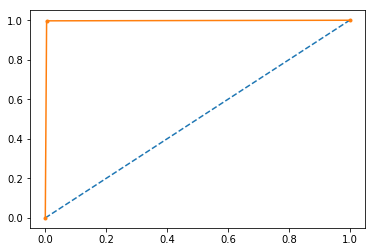

In [51]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [0]:
#linear SVM
def get_params_lsvm(X_train, y_train, X_valid, y_valid):
  Cs = [10**i for i in range(-3, 3)]
  max_iters = [1000, 2000]
  losses = ['hinge', 'squared_hinge']
  best_score = 0 
  best_params = {'C':0, 'max_iter': [1000], 'loss' : ['hinge']}

  for C in Cs: 
    for max_iter in max_iters:
      for loss in losses:
        lsvm = svm.LinearSVC(C = C, max_iter = max_iter, loss = loss)
        lsvm.fit(X_train, y_train)
        y_pred = lsvm.predict(X_valid)
        score = metrics.accuracy_score(y_valid, y_pred)
        if score>best_score: 
            best_score = score
            best_params['C'] = C
            best_params['max_iter'] = max_iter
            best_params['loss'] = loss
  return best_params

In [53]:
best_params = get_params_lsvm(X_train, y_train, X_valid, y_valid)
print('Best parameters:\n', best_params)
lsvm = svm.LinearSVC(C = best_params['C'], max_iter = best_params['max_iter'], loss = best_params['loss'])
lsvm.fit(X_train_valid, y_train_valid)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best parameters:
 {'C': 0.1, 'max_iter': 1000, 'loss': 'hinge'}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [54]:
y_train_valid_pred = lsvm.predict(X_train_valid)
y_test_pred = lsvm.predict(X_test)
print('Train report: {}'.format(metrics.classification_report(y_train_valid, y_train_valid_pred)))
print('Test report: {}'.format(metrics.classification_report(y_test, y_test_pred)))

Train report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97     10391
           1       0.98      0.98      0.98     15100

    accuracy                           0.98     25491
   macro avg       0.98      0.98      0.98     25491
weighted avg       0.98      0.98      0.98     25491

Test report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1155
           1       0.98      0.98      0.98      1678

    accuracy                           0.98      2833
   macro avg       0.98      0.98      0.98      2833
weighted avg       0.98      0.98      0.98      2833



In [55]:
metrics.accuracy_score(y_train_valid, y_train_valid_pred)

0.9779922325526657

In [56]:
metrics.accuracy_score(y_test, y_test_pred)

0.9791740204729968

In [57]:
confusion_matrix(y_test, y_test_pred)

array([[1126,   29],
       [  30, 1648]])

In [0]:
#SVM sa rbf kernelom
#rbf je default kernel u svc

def get_params_rbf(X_train, y_train, X_valid, y_valid):
  Cs = [10**i for i in range(-3, 3)]
  gammas = np.array([10**i for i in range(-3, 3)])
  best_score = 0 
  best_params = {'C':0, 'gamma' : 0}

  for C in Cs: 
    for gamma in gammas:
        rbf = svm.SVC(C = C, gamma = gamma)
        rbf.fit(X_train, y_train)
        y_pred = rbf.predict(X_valid)
        score = metrics.accuracy_score(y_valid, y_pred)
        if score>best_score: 
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

  return best_params

In [62]:
best_params = get_params_rbf(X_train, y_train, X_valid, y_valid)
print('Best parameters:\n', best_params)
rbf = svm.SVC(C = best_params['C'], gamma = best_params['gamma'])
rbf.fit(X_train_valid, y_train_valid)

Best parameters:
 {'C': 100, 'gamma': 1.0}


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
y_train_valid_pred = rbf.predict(X_train_valid)
y_test_pred = rbf.predict(X_test)
print('Train report: {}'.format(metrics.classification_report(y_train_valid, y_train_valid_pred)))
print('Test report: {}'.format(metrics.classification_report(y_test, y_test_pred)))

Train report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99     10391
           1       0.99      1.00      1.00     15100

    accuracy                           0.99     25491
   macro avg       0.99      0.99      0.99     25491
weighted avg       0.99      0.99      0.99     25491

Test report:               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1155
           1       0.99      1.00      1.00      1678

    accuracy                           0.99      2833
   macro avg       0.99      0.99      0.99      2833
weighted avg       0.99      0.99      0.99      2833



In [64]:
metrics.accuracy_score(y_train_valid, y_train_valid_pred)

0.9941547997332392

In [65]:
metrics.accuracy_score(y_test, y_test_pred)

0.9943522767384398

In [66]:
confusion_matrix(y_test, y_test_pred)

array([[1144,   11],
       [   5, 1673]])

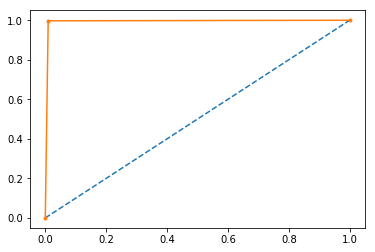

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [0]:
#rezultati koje dobijamo kada drop-ujemo kolone predikcija iz multinomijalnog naivnog bajesa, prikazane tacnosti za test skup radi poredjenja

In [68]:
final_ds.head()

,label,len deep url,label_proba_0,label_proba_1,len of domain,suffix_,suffix_ac.uk,suffix_asia,suffix_at,suffix_be,suffix_cc,suffix_ch,suffix_cl,suffix_cn,suffix_co.id,suffix_co.uk,suffix_co.za,suffix_com,suffix_com.ar,suffix_com.au,suffix_com.br,suffix_com.cn,suffix_com.my,suffix_com.tw,suffix_com.ua,suffix_com.vn,suffix_cz,suffix_de,suffix_dk,suffix_es,suffix_eu,suffix_fr,suffix_gov.br,suffix_gov.uk,suffix_gr,suffix_hu,suffix_in,suffix_info,suffix_ir,suffix_it,suffix_jp,suffix_net,suffix_net.ua,suffix_net.vn,suffix_nl,suffix_org,suffix_org.uk,suffix_pl,suffix_ro,suffix_ru,suffix_se,suffix_to,suffix_tv,suffix_ua,suffix_vn
0,1,154,9.566127e-27,1.000000,14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,71,9.616888e-01,0.038311,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,51,1.065991e-09,1.000000,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,74,9.998239e-01,0.000176,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,77,9.999947e-01,0.000005,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
#uzimamo X i y za trening i test i vrsimo podelu
X_no_nb = final_ds.drop(['label','label_proba_0','label_proba_1'],axis=1) 
y_no_nb = final_ds['label']

#train test split
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_no_nb, y_no_nb, test_size=0.1, random_state=42, stratify = y_no_nb)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.20, random_state=42, stratify = y_train_valid)

In [0]:
ss1 = StandardScaler()
X_train = ss1.fit_transform(X_train)
X_valid = ss1.transform(X_valid)

In [0]:
ss2 = StandardScaler()
X_train_valid = ss2.fit_transform(X_train_valid)
X_test = ss2.transform(X_test)

In [0]:
#random forest

In [72]:
best_params = get_params_rf(X_train, y_train, X_valid, y_valid)
print('Best parameters:\n', best_params)
rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], criterion=best_params['criterion'])
rf.fit(X_train_valid, y_train_valid)

Best parameters:
 {'n_estimators': 100, 'max_depth': 30, 'criterion': 'gini'}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
metrics.accuracy_score(y_train_valid, rf.predict(X_train_valid))

0.9568475148091483

In [74]:
metrics.accuracy_score(y_test, rf.predict(X_test))

0.9322273208612778

In [0]:
#linear svm

In [75]:
best_params = get_params_lsvm(X_train, y_train, X_valid, y_valid)
print('Best parameters:\n', best_params)
lsvm = svm.LinearSVC(C = best_params['C'], max_iter = best_params['max_iter'], loss = best_params['loss'])
lsvm.fit(X_train_valid, y_train_valid)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best parameters:
 {'C': 1, 'max_iter': 2000, 'loss': 'hinge'}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=2000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [76]:
metrics.accuracy_score(y_train_valid, lsvm.predict(X_train_valid))

0.8255070417009925

In [77]:
metrics.accuracy_score(y_test, lsvm.predict(X_test))

0.8210377691493117

In [0]:
#SVM sa rbf kernelom

In [78]:
best_params = get_params_rbf(X_train, y_train, X_valid, y_valid)
print('Best parameters:\n', best_params)
rbf = svm.SVC(C = best_params['C'], gamma = best_params['gamma'])
rbf.fit(X_train_valid, y_train_valid)

Best parameters:
 {'C': 100, 'gamma': 10.0}


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
metrics.accuracy_score(y_train_valid, rbf.predict(X_train_valid))

0.9462947707033855

In [80]:
metrics.accuracy_score(y_test, rbf.predict(X_test))

0.9301094246381927